In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [74]:
file_path = 'Wine_data_v2.csv'
wine_data = pd.read_csv(file_path, header=None)

features = wine_data.iloc[:, :-1]
labels = wine_data.iloc[:, -1]   

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

wine_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,1


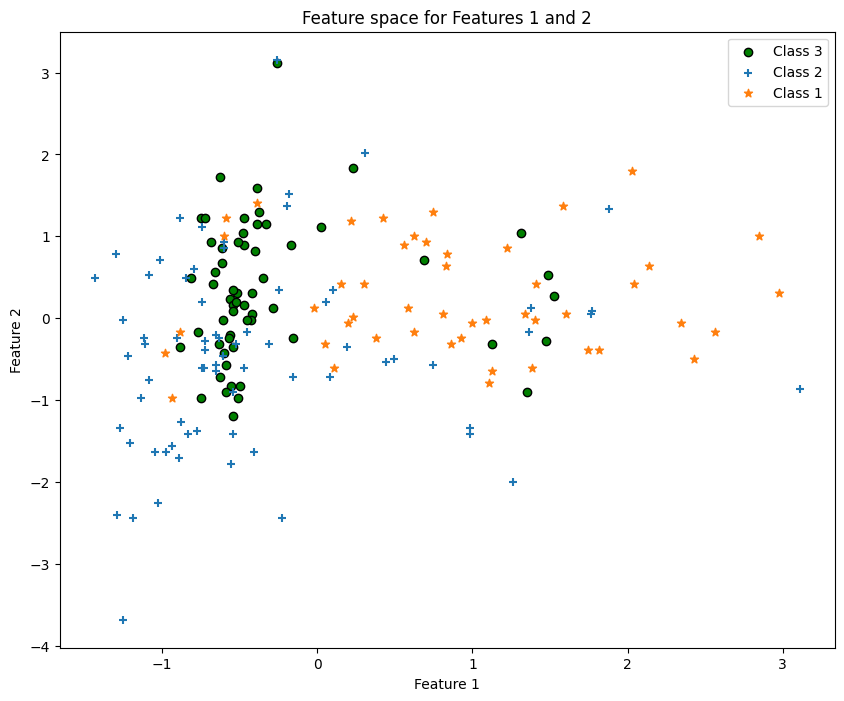

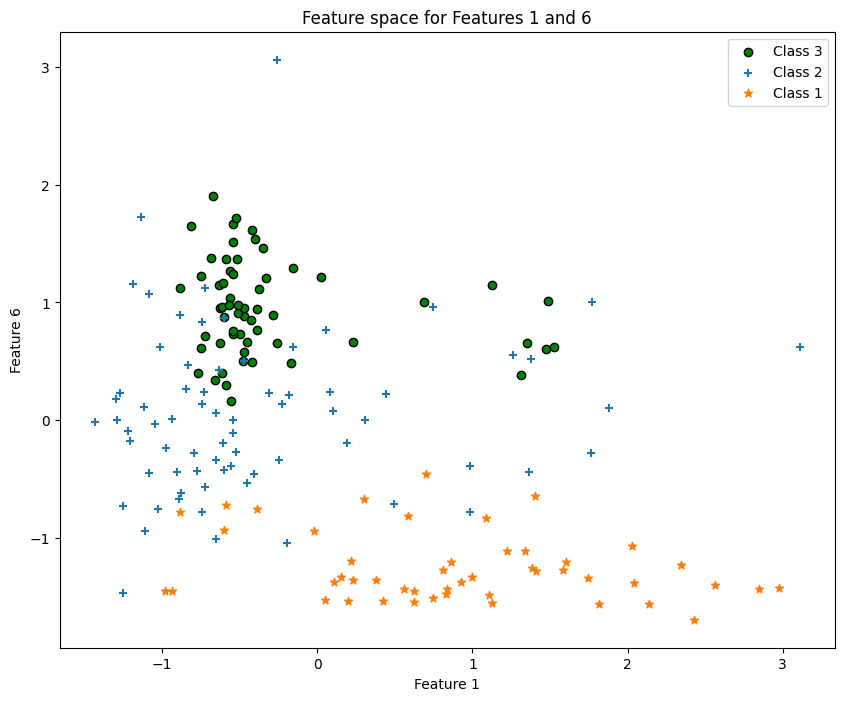

In [75]:
def plot_feature_space(X, y, feature_indices, title):
    x_index, y_index = feature_indices
    class_1 = y == 1
    class_2 = y == 2
    class_3 = y == 3

    plt.figure(figsize=(10, 8))
    plt.scatter(X[class_1, x_index], X[class_1, y_index],c='g', label='Class 3', edgecolor='k')
    plt.scatter(X[class_2, x_index], X[class_2, y_index], marker= '+', label='Class 2')
    plt.scatter(X[class_3, x_index], X[class_3, y_index], marker= '*', label='Class 1')
    
    plt.xlabel(f'Feature {x_index + 1}')
    plt.ylabel(f'Feature {y_index + 1}')
    plt.title(title)
    plt.legend()
    plt.show()

plot_feature_space(features_standardized, labels, (0, 1), 'Feature space for Features 1 and 2')
plot_feature_space(features_standardized, labels, (0, 5), 'Feature space for Features 1 and 6')


In [76]:
features_to_use = [0, 1]  

X_f= features_standardized[:, features_to_use]

best_run = {'error_rate': np.inf, 'weights': None, 'fold_data': None}
worst_run = {'error_rate': 0, 'weights': None, 'fold_data': None}

error_rates = []

for run in range(5):
    kf = KFold(n_splits=20, shuffle=True, random_state=run)
    model = Perceptron(tol=1e-3, random_state=run)

    scores = cross_val_score(model, X_f, labels, cv=kf, scoring='accuracy')

    error_rate = (1 - scores).mean()
    error_rates.append(error_rate)
    print(f"Run {run+1}: Mean Classification Error Rate = {error_rate:.4f}")

    if error_rate < best_run['error_rate']:
        best_run['error_rate'] = error_rate
        for train_index, test_index in kf.split(X_f):
            model.fit(X_f[train_index], labels[train_index])
            best_run['weights'] = model.coef_
            break  

    if error_rate > worst_run['error_rate']:
        worst_run['error_rate'] = error_rate
        for train_index, test_index in kf.split(X_f):
            model.fit(X_f[train_index], labels[train_index])
            worst_run['weights'] = model.coef_
            break  

average_error = np.mean(error_rates)
std_dev_error = np.std(error_rates)


(average_error, std_dev_error, best_run['error_rate'], worst_run['error_rate'])
print(f"Average Error Rate over 5 runs: {average_error:.4f}")
print(f"Standard Deviation of Error Rates over 5 runs: {std_dev_error:.4f}")


Run 1: Mean Classification Error Rate = 0.5229
Run 2: Mean Classification Error Rate = 0.5104
Run 3: Mean Classification Error Rate = 0.5125
Run 4: Mean Classification Error Rate = 0.4986
Run 5: Mean Classification Error Rate = 0.4618
Average Error Rate over 5 runs: 0.5012
Standard Deviation of Error Rates over 5 runs: 0.0212


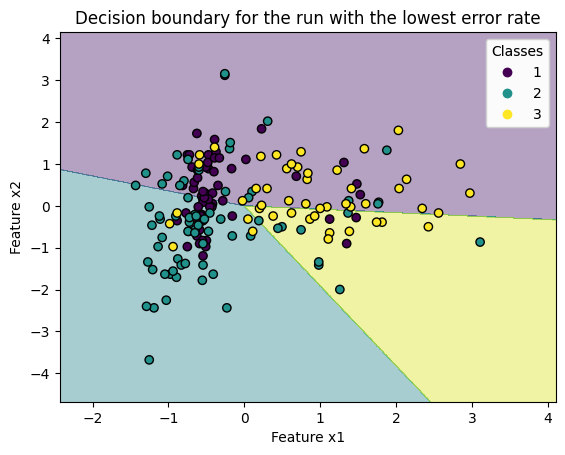

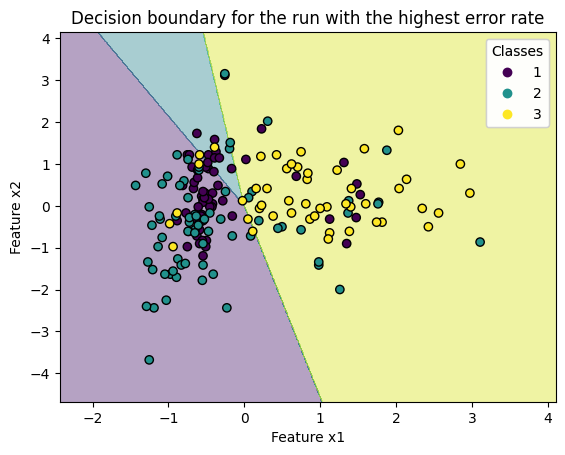

In [77]:
def plot_decision_boundary(X, y, weights, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    fig, ax = plt.subplots()
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights.T)
    Z = np.argmax(Z, axis=1) + 1
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)

    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    

    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)
    
    plt.title(title)
    plt.xlabel('Feature x1')
    plt.ylabel('Feature x2')

    return fig, ax

fig_lowest, ax_lowest = plot_decision_boundary(X_f, labels, best_run['weights'],
                                               'Decision boundary for the run with the lowest error rate')

fig_highest, ax_highest = plot_decision_boundary(X_f, labels, worst_run['weights'],
                                                 'Decision boundary for the run with the highest error rate')

plt.show()


In [78]:
features_to_use_x1_x6 = [0, 5]  

X_selected_x1_x6 = features_standardized[:, features_to_use_x1_x6]

best_run_x1_x6 = {'error_rate': np.inf, 'weights': None, 'fold_data': None}
worst_run_x1_x6 = {'error_rate': 0, 'weights': None, 'fold_data': None}

error_rates_x1_x6 = []


for run in range(5):
   
    kf_x1_x6 = KFold(n_splits=20, shuffle=True, random_state=run)
    model_x1_x6 = Perceptron(tol=1e-3, random_state=run)

    scores_x1_x6 = cross_val_score(model_x1_x6, X_selected_x1_x6, labels, cv=kf_x1_x6, scoring='accuracy')

    error_rate_x1_x6 = (1 - scores_x1_x6).mean()
    error_rates_x1_x6.append(error_rate_x1_x6)
    print(f"Run {run+1}: Mean Classification Error Rate = {error_rate_x1_x6:.4f}")

    if error_rate_x1_x6 < best_run_x1_x6['error_rate']:
        best_run_x1_x6['error_rate'] = error_rate_x1_x6
        for train_index, test_index in kf_x1_x6.split(X_selected_x1_x6):
            model_x1_x6.fit(X_selected_x1_x6[train_index], labels[train_index])
            best_run_x1_x6['weights'] = model_x1_x6.coef_
            break 

    if error_rate_x1_x6 > worst_run_x1_x6['error_rate']:
        worst_run_x1_x6['error_rate'] = error_rate_x1_x6
        for train_index, test_index in kf_x1_x6.split(X_selected_x1_x6):
            model_x1_x6.fit(X_selected_x1_x6[train_index], labels[train_index])
            worst_run_x1_x6['weights'] = model_x1_x6.coef_
            break 

average_error_x1_x6 = np.mean(error_rates_x1_x6)
std_dev_error_x1_x6 = np.std(error_rates_x1_x6)


(average_error_x1_x6, std_dev_error_x1_x6, best_run_x1_x6['error_rate'], worst_run_x1_x6['error_rate'])
print(f"Average Error Rate over 5 runs: {average_error_x1_x6:.4f}")
print(f"Standard Deviation of Error Rates over 5 runs: {std_dev_error_x1_x6:.4f}")


Run 1: Mean Classification Error Rate = 0.2646
Run 2: Mean Classification Error Rate = 0.2965
Run 3: Mean Classification Error Rate = 0.3299
Run 4: Mean Classification Error Rate = 0.3188
Run 5: Mean Classification Error Rate = 0.2757
Average Error Rate over 5 runs: 0.2971
Standard Deviation of Error Rates over 5 runs: 0.0247


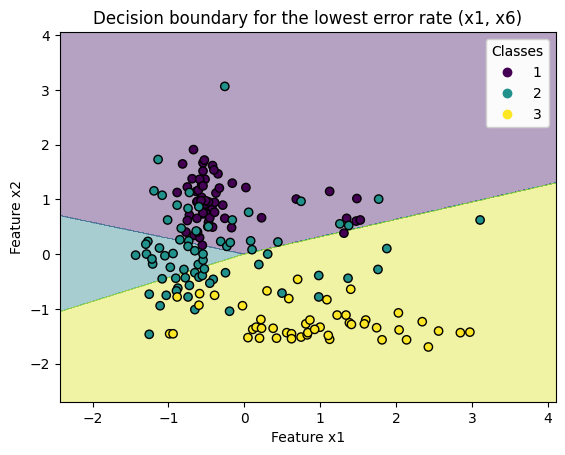

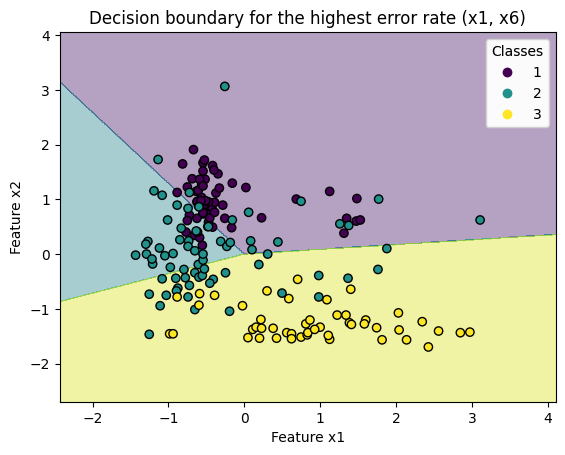

In [79]:
fig_lowest_x1_x6, ax_lowest_x1_x6 = plot_decision_boundary(X_selected_x1_x6, labels, best_run_x1_x6['weights'],
                                                           'Decision boundary for the lowest error rate (x1, x6)')

fig_highest_x1_x6, ax_highest_x1_x6 = plot_decision_boundary(X_selected_x1_x6, labels, worst_run_x1_x6['weights'],
                                                             'Decision boundary for the highest error rate (x1, x6)')

plt.show()


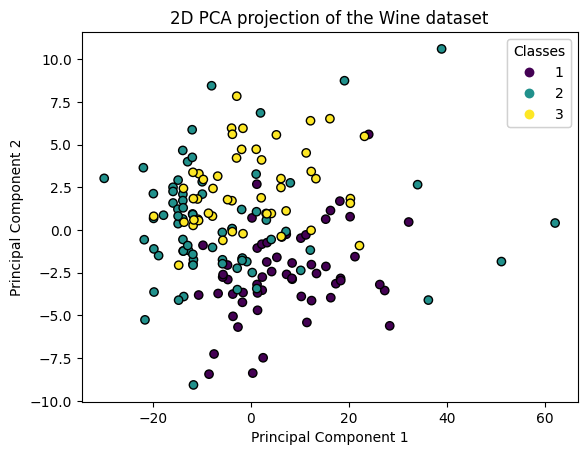

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, edgecolors='k')
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA projection of the Wine dataset')
plt.show()


In [81]:
best_run_pca = {'error_rate': np.inf, 'weights': None, 'fold_data': None}
worst_run_pca = {'error_rate': 0, 'weights': None, 'fold_data': None}

error_rates_pca = []

for run in range(5):
    kf_pca = KFold(n_splits=20, shuffle=True, random_state=run)
    model_pca = Perceptron(tol=1e-3, random_state=run)

    scores_pca = cross_val_score(model_pca, X_pca, labels, cv=kf_pca, scoring='accuracy')

    error_rate_pca = (1 - scores_pca).mean()
    error_rates_pca.append(error_rate_pca)
    print(f"Run {run+1}: Mean Classification Error Rate = {error_rate_pca:.4f}")

    if error_rate_pca < best_run_pca['error_rate']:
        best_run_pca['error_rate'] = error_rate_pca
        for train_index, test_index in kf_pca.split(X_pca):
            model_pca.fit(X_pca[train_index], labels[train_index])
            best_run_pca['weights'] = model_pca.coef_
            break  

    if error_rate_pca > worst_run_pca['error_rate']:
        worst_run_pca['error_rate'] = error_rate_pca
        for train_index, test_index in kf_pca.split(X_pca):
            model_pca.fit(X_pca[train_index], labels[train_index])
            worst_run_pca['weights'] = model_pca.coef_
            break 

average_error_pca = np.mean(error_rates_pca)
std_dev_error_pca = np.std(error_rates_pca)


(average_error_pca, std_dev_error_pca, best_run_pca['error_rate'], worst_run_pca['error_rate'])
print(f"Average Error Rate over 5 runs: {average_error_pca:.4f}")
print(f"Standard Deviation of Error Rates over 5 runs: {std_dev_error_pca:.4f}")


Run 1: Mean Classification Error Rate = 0.4354
Run 2: Mean Classification Error Rate = 0.5111
Run 3: Mean Classification Error Rate = 0.4222
Run 4: Mean Classification Error Rate = 0.5535
Run 5: Mean Classification Error Rate = 0.5694
Average Error Rate over 5 runs: 0.4983
Standard Deviation of Error Rates over 5 runs: 0.0600


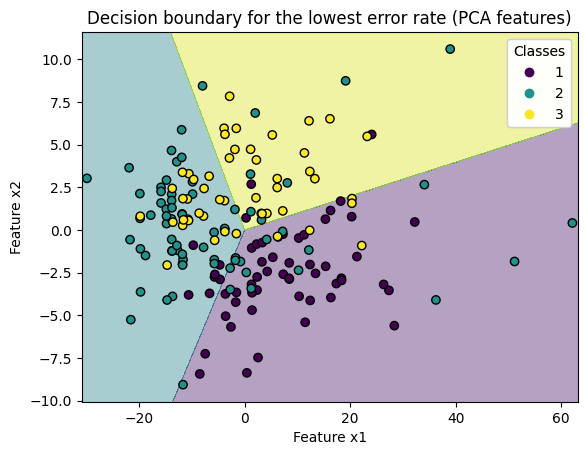

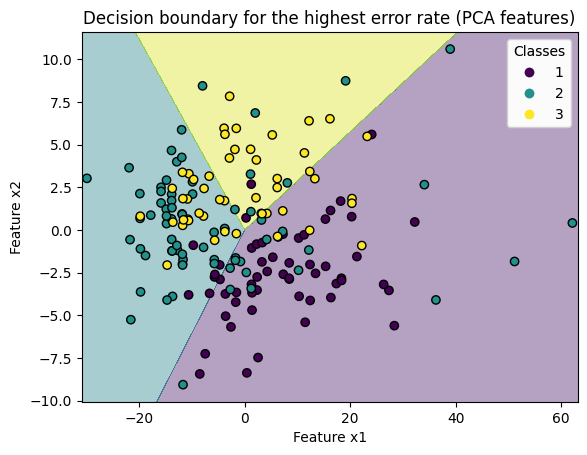

In [82]:
fig_lowest_pca, ax_lowest_pca = plot_decision_boundary(X_pca, labels, best_run_pca['weights'],
                                                       'Decision boundary for the lowest error rate (PCA features)')

fig_highest_pca, ax_highest_pca = plot_decision_boundary(X_pca, labels, worst_run_pca['weights'],
                                                         'Decision boundary for the highest error rate (PCA features)')

plt.show()


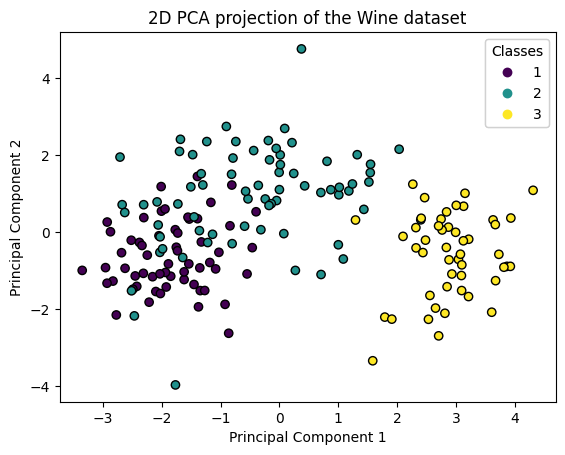

In [83]:
pca1 = PCA(n_components=2)
X_pca1 = pca1.fit_transform(features_standardized)

fig, ax = plt.subplots()
scatter = ax.scatter(X_pca1[:, 0], X_pca1[:, 1], c=labels, edgecolors='k')
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA projection of the Wine dataset')
plt.show()

In [84]:
best_run_pca1 = {'error_rate': np.inf, 'weights': None, 'fold_data': None}
worst_run_pca1 = {'error_rate': 0, 'weights': None, 'fold_data': None}

error_rates_pca1 = []

for run in range(5):
    kf_pca1 = KFold(n_splits=20, shuffle=True, random_state=run)
    model_pca1 = Perceptron(tol=1e-3, random_state=run)

    scores_pca1 = cross_val_score(model_pca1, X_pca1, labels, cv=kf_pca1, scoring='accuracy')

    error_rate_pca1 = (1 - scores_pca1).mean()
    error_rates_pca1.append(error_rate_pca1)
    print(f"Run {run+1}: Mean Classification Error Rate = {error_rate_pca1:.4f}")

    if error_rate_pca1 < best_run_pca1['error_rate']:
        best_run_pca1['error_rate'] = error_rate_pca1
        for train_index, test_index in kf_pca1.split(X_pca1):
            model_pca1.fit(X_pca1[train_index], labels[train_index])
            best_run_pca1['weights'] = model_pca1.coef_
            break  

    if error_rate_pca1 > worst_run_pca1['error_rate']:
        worst_run_pca1['error_rate'] = error_rate_pca1
        for train_index, test_index in kf_pca1.split(X_pca1):
            model_pca1.fit(X_pca1[train_index], labels[train_index])
            worst_run_pca1['weights'] = model_pca1.coef_
            break 

average_error_pca1 = np.mean(error_rates_pca1)
std_dev_error_pca1 = np.std(error_rates_pca1)


(average_error_pca1, std_dev_error_pca1, best_run_pca1['error_rate'], worst_run_pca1['error_rate'])
print(f"Average Error Rate over 5 runs: {average_error_pca1:.4f}")
print(f"Standard Deviation of Error Rates over 5 runs: {std_dev_error_pca1:.4f}")


Run 1: Mean Classification Error Rate = 0.2056
Run 2: Mean Classification Error Rate = 0.1917
Run 3: Mean Classification Error Rate = 0.2069
Run 4: Mean Classification Error Rate = 0.2507
Run 5: Mean Classification Error Rate = 0.2201
Average Error Rate over 5 runs: 0.2150
Standard Deviation of Error Rates over 5 runs: 0.0200


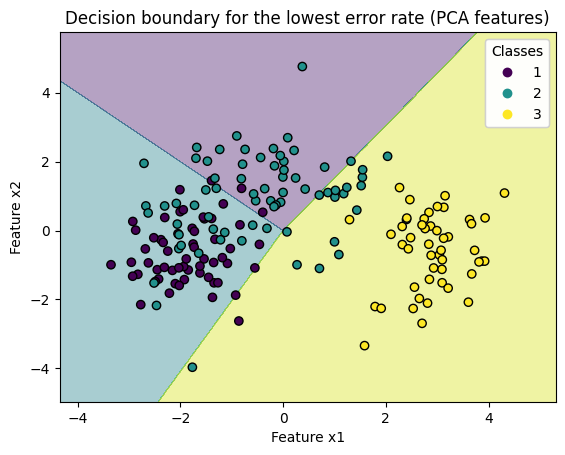

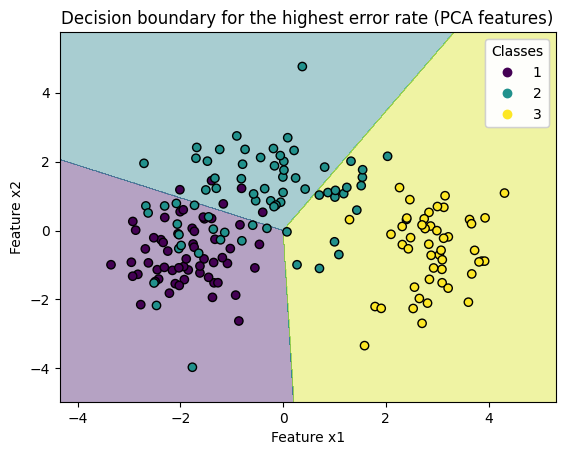

In [85]:
fig_lowest_pca, ax_lowest_pca = plot_decision_boundary(X_pca1, labels, best_run_pca1['weights'],
                                                       'Decision boundary for the lowest error rate (PCA features)')

fig_highest_pca, ax_highest_pca = plot_decision_boundary(X_pca1, labels, worst_run_pca1['weights'],
                                                         'Decision boundary for the highest error rate (PCA features)')

plt.show()


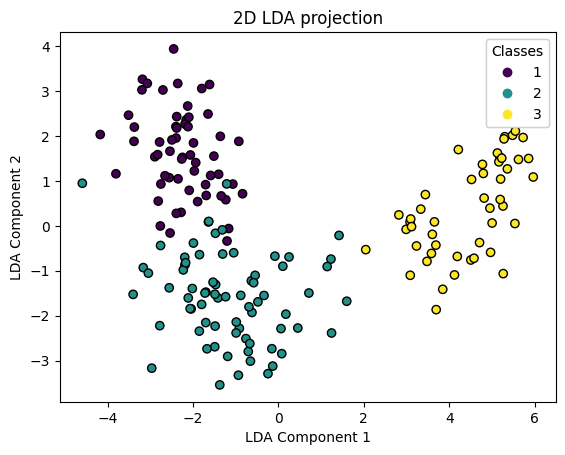

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(features_standardized, labels)

fig, ax = plt.subplots()
scatter = ax.scatter(X_lda[:, 0], X_lda[:, 1], c=labels, edgecolors='k')
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('2D LDA projection')
plt.show()


In [87]:
best_run_lda = {'error_rate': np.inf, 'weights': None, 'fold_data': None}
worst_run_lda = {'error_rate': 0, 'weights': None, 'fold_data': None}
error_rates_lda = []

for run in range(5):
    kf_lda = KFold(n_splits=20, shuffle=True, random_state=run)
    model_lda = Perceptron(tol=1e-3, random_state=run)

    scores_lda = cross_val_score(model_lda, X_lda, labels, cv=kf_lda, scoring='accuracy')
    error_rate_lda = (1 - scores_lda).mean()
    error_rates_lda.append(error_rate_lda)
    print(f"Run {run+1}: Mean Classification Error Rate = {error_rate_lda:.4f}")

    if error_rate_lda < best_run_lda['error_rate']:
        best_run_lda['error_rate'] = error_rate_lda
        for train_index, _ in kf_lda.split(X_lda):
            model_lda.fit(X_lda[train_index], labels[train_index])
            best_run_lda['weights'] = model_lda.coef_
            break

    if error_rate_lda > worst_run_lda['error_rate']:
        worst_run_lda['error_rate'] = error_rate_lda
        for train_index, _ in kf_lda.split(X_lda):
            model_lda.fit(X_lda[train_index], labels[train_index])
            worst_run_lda['weights'] = model_lda.coef_
            break

average_error_lda = np.mean(error_rates_lda)
std_dev_error_lda = np.std(error_rates_lda)

print(average_error_lda, std_dev_error_lda, best_run_lda['error_rate'], worst_run_lda['error_rate'])
print(f"Average Error Rate over 5 runs: {average_error_lda:.4f}")
print(f"Standard Deviation of Error Rates over 5 runs: {std_dev_error_lda:.4f}")


Run 1: Mean Classification Error Rate = 0.0722
Run 2: Mean Classification Error Rate = 0.0618
Run 3: Mean Classification Error Rate = 0.0556
Run 4: Mean Classification Error Rate = 0.0444
Run 5: Mean Classification Error Rate = 0.0507
0.056944444444444464 0.009531866631540827 0.04444444444444445 0.07222222222222223
Average Error Rate over 5 runs: 0.0569
Standard Deviation of Error Rates over 5 runs: 0.0095


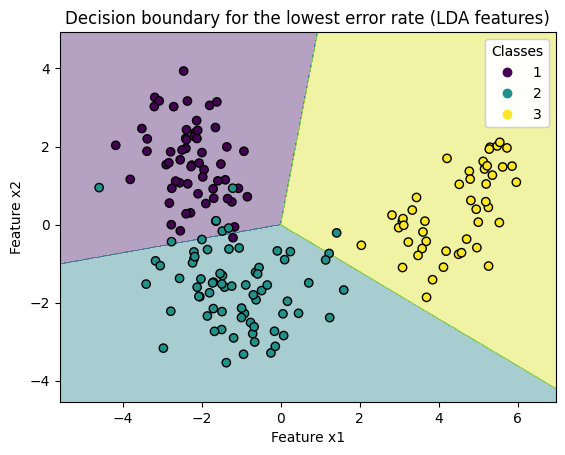

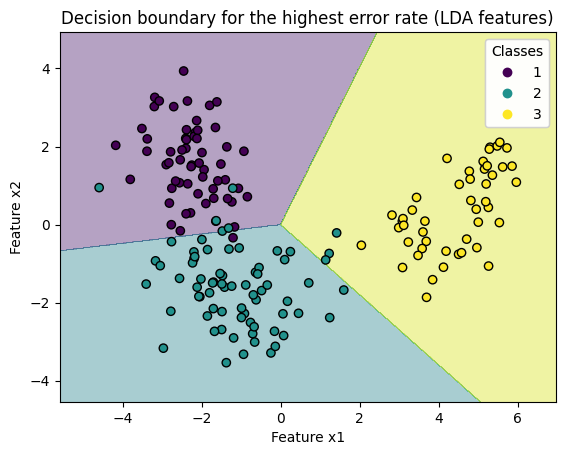

In [88]:
fig_lowest_lda, ax_lowest_lda = plot_decision_boundary(X_lda, labels, best_run_lda['weights'],
                                                       'Decision boundary for the lowest error rate (LDA features)')

fig_highest_lda, ax_highest_lda = plot_decision_boundary(X_lda, labels, worst_run_lda['weights'],
                                                         'Decision boundary for the highest error rate (LDA features)')

plt.show()
